In [13]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [14]:
# Load files into a pandas dataframe
train = pd.read_csv('./data/Train.csv')
test = pd.read_csv('./data/Test.csv')
ss = pd.read_csv('./data/SampleSubmission.csv')

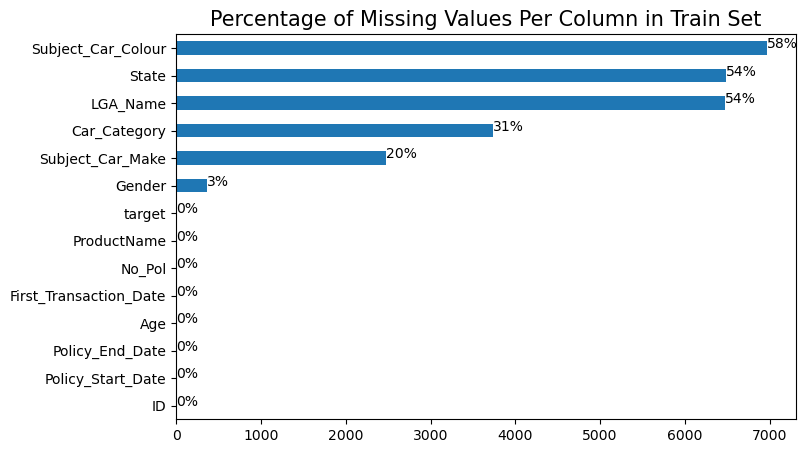

In [15]:
ax = train.isna().sum().sort_values().plot(kind = 'barh', figsize = (8, 5))
plt.title('Percentage of Missing Values Per Column in Train Set', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/train.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

In [35]:
def clean_age(age):
    if pd.isna(age) or age < 0 or age > 100:
        return np.nan
    return age

train['Age'] = train['Age'].apply(clean_age)
train['Age'] = train['Age'].fillna(train['Age'].mean)


In [36]:
train['Gender'] = train['Gender'].fillna(train['Gender'].mode()[0])

mapper = {'Entity':'Other', 'Joint Gender':'Other', 'NOT STATED':'Other', 'NO GENDER': 'Other', 'SEX':"Other"}
train.Gender = train.Gender.replace(mapper)

In [37]:
train['Policy_Start_Date'] = pd.to_datetime(train['Policy_Start_Date'])
train['Policy_End_Date'] = pd.to_datetime(train['Policy_End_Date'])
train['First_Transaction_Date'] = pd.to_datetime(train['First_Transaction_Date'])

train['StartMonth'] = train['Policy_Start_Date'].dt.month
train['EndMonth'] = train['Policy_End_Date'].dt.month
train['FirstMonth'] = train['First_Transaction_Date'].dt.month

train['StartDay'] = train['Policy_Start_Date'].dt.day
train['EndDay'] = train['Policy_End_Date'].dt.day
train['FirstDay'] = train['First_Transaction_Date'].dt.day

In [38]:
train

,ID,Policy_Start_Date,Policy_End_Date,Gender,Age,First_Transaction_Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target,StartMonth,EndMonth,FirstMonth,StartDay,EndDay,FirstDay
8010,ID_O51ZQ1B,2001-12-11,2011-12-10,Female,37.0,2001-12-11,1,Saloon,Black,Honda,Ekiti,Benue,Car Vintage,0,12,12,12,11,10,11
10526,ID_VJ1FAVO,2002-03-25,2011-03-24,Male,37.0,2002-03-25,1,Saloon,Black,TOYOTA,Ekiti,Benue,Car Classic,0,3,3,3,25,24,25
10234,ID_ULWS8VL,2003-04-13,2011-04-12,Male,41.0,2003-04-13,2,Saloon,Black,TOYOTA,Ikeja,Lagos,Car Vintage,0,4,4,4,13,12,13
12066,ID_ZYKGSP7,2003-12-21,2034-05-20,Male,48.0,2003-12-21,2,Saloon,Gold,BMW,Ajah,Lagos,Car Vintage,0,12,5,12,21,20,21
8124,ID_OEWBKGF,2005-08-05,2011-09-29,Female,44.0,2005-08-05,1,Saloon,Gold,Tata,Ajah,Lagos,CVTP,0,8,9,8,5,29,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7479,ID_MLGO8DZ,2010-12-31,2011-06-30,Male,51.0,2010-12-31,4,Saloon,Black,Honda,Victoria Island,Lagos,Car Classic,0,12,6,12,31,30,31
1997,ID_62LBOWI,2010-12-31,2011-12-30,Male,44.0,2010-12-31,1,JEEP,Silver,Hyundai,Victoria Island,Lagos,Car Classic,0,12,12,12,31,30,31
11299,ID_XR8F115,2010-12-31,2011-12-30,Male,37.0,2010-12-31,1,JEEP,Silver,Hyundai,Anthony Village,Lagos,CarSafe,0,12,12,12,31,30,31
2919,ID_8P2UGYO,2010-12-31,2011-12-30,Male,20.0,2010-12-31,1,Saloon,Silver,Kia,Anthony Village,Lagos,CarSafe,0,12,12,12,31,30,31


In [39]:
train = train.sort_values(by='Policy_Start_Date')
train

,ID,Policy_Start_Date,Policy_End_Date,Gender,Age,First_Transaction_Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target,StartMonth,EndMonth,FirstMonth,StartDay,EndDay,FirstDay
8010,ID_O51ZQ1B,2001-12-11,2011-12-10,Female,37.0,2001-12-11,1,Saloon,Black,Honda,Ekiti,Benue,Car Vintage,0,12,12,12,11,10,11
10526,ID_VJ1FAVO,2002-03-25,2011-03-24,Male,37.0,2002-03-25,1,Saloon,Black,TOYOTA,Ekiti,Benue,Car Classic,0,3,3,3,25,24,25
10234,ID_ULWS8VL,2003-04-13,2011-04-12,Male,41.0,2003-04-13,2,Saloon,Black,TOYOTA,Ikeja,Lagos,Car Vintage,0,4,4,4,13,12,13
12066,ID_ZYKGSP7,2003-12-21,2034-05-20,Male,48.0,2003-12-21,2,Saloon,Gold,BMW,Ajah,Lagos,Car Vintage,0,12,5,12,21,20,21
8124,ID_OEWBKGF,2005-08-05,2011-09-29,Female,44.0,2005-08-05,1,Saloon,Gold,Tata,Ajah,Lagos,CVTP,0,8,9,8,5,29,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11776,ID_Z44A2PD,2010-12-31,2011-12-30,Male,28.0,2010-12-31,1,Saloon,Grey,Mercedes,Victoria Island,Lagos,CarSafe,0,12,12,12,31,30,31
8345,ID_P26FKEF,2010-12-31,2011-12-30,Female,35.0,2010-12-31,1,Saloon,Grey,Mercedes,Victoria Island,Lagos,Car Classic,0,12,12,12,31,30,31
2919,ID_8P2UGYO,2010-12-31,2011-12-30,Male,20.0,2010-12-31,1,Saloon,Silver,Kia,Anthony Village,Lagos,CarSafe,0,12,12,12,31,30,31
1794,ID_5H6MECP,2010-12-31,2011-12-30,Female,48.0,2010-12-31,1,Saloon,Black,TOYOTA,Victoria Island,Lagos,CarSafe,0,12,12,12,31,30,31


In [40]:
def backfill_data(data, columns):
    for column in columns:
        data[column] = data[column].fillna(method='bfill')
    return data

backfill_columns = ['Car_Category', 'Subject_Car_Colour', 'Subject_Car_Make', 'LGA_Name', 'State']
    
backfilled_data = backfill_data(train, backfill_columns)

print("Original Data:")
print(train)
print("\nBackfilled Data:")
print(backfilled_data)
backfilled_data.to_csv('backfilled_data.csv', index=False)


Original Data:
               ID Policy_Start_Date Policy_End_Date  Gender   Age  \
8010   ID_O51ZQ1B        2001-12-11      2011-12-10  Female  37.0   
10526  ID_VJ1FAVO        2002-03-25      2011-03-24    Male  37.0   
10234  ID_ULWS8VL        2003-04-13      2011-04-12    Male  41.0   
12066  ID_ZYKGSP7        2003-12-21      2034-05-20    Male  48.0   
8124   ID_OEWBKGF        2005-08-05      2011-09-29  Female  44.0   
...           ...               ...             ...     ...   ...   
11776  ID_Z44A2PD        2010-12-31      2011-12-30    Male  28.0   
8345   ID_P26FKEF        2010-12-31      2011-12-30  Female  35.0   
2919   ID_8P2UGYO        2010-12-31      2011-12-30    Male  20.0   
1794   ID_5H6MECP        2010-12-31      2011-12-30  Female  48.0   
2886   ID_8MNXRC6        2010-12-31      2011-12-16    Male  36.0   

      First_Transaction_Date  No_Pol Car_Category Subject_Car_Colour  \
8010              2001-12-11       1       Saloon              Black   
10526       

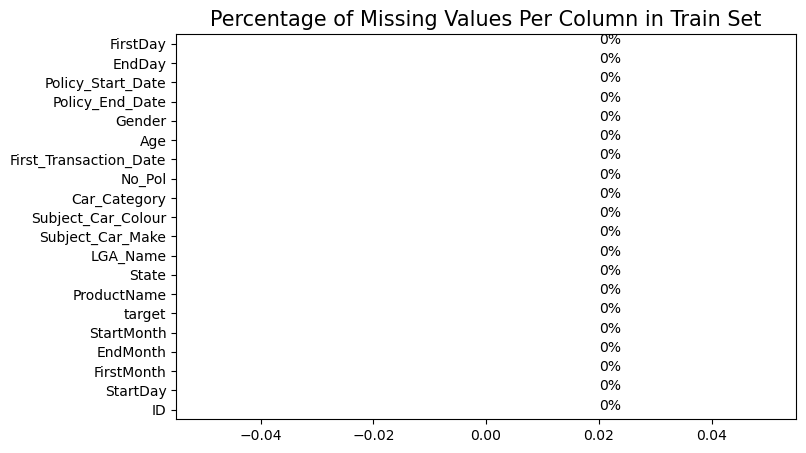

In [41]:
# Check if there any missing values in train set
ax = backfilled_data.isna().sum().sort_values().plot(kind = 'barh', figsize = (8, 5))
plt.title('Percentage of Missing Values Per Column in Train Set', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/backfilled_data.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))